In [1]:
import cv2
from keras.models import load_model
import matplotlib.pyplot as plt
from utils_model import params, jacard_coef
import os
import numpy as np

2023-07-02 02:21:08.321801: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-02 02:21:08.370209: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-02 02:21:09.068070: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Segmentation Models: using `keras` framework.


In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [3]:
image_path = 'unsegmented19.png'
model_path = 'models/BDD100K_U_last.hdf5'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.resize(image, (480, 288))

In [4]:
total_loss, metrics = params('weights.txt')

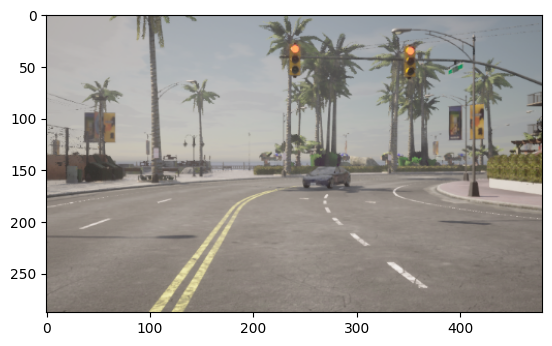

In [5]:
plt.imshow(image)

In [6]:
model = load_model(model_path, custom_objects = { 'dice_loss_plus_1focal_loss': total_loss,'jacard_coef': jacard_coef})

2023-07-02 02:21:11.872956: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-07-02 02:21:11.873030: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: Priyansh-Ubuntu
2023-07-02 02:21:11.873040: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: Priyansh-Ubuntu
2023-07-02 02:21:11.873297: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 530.41.3
2023-07-02 02:21:11.873336: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 530.41.3
2023-07-02 02:21:11.873343: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 530.41.3


In [7]:
image = np.array([image]) / 255

In [8]:
pred = model.predict(image, verbose=0)[0]

In [9]:
new = np.argmax(pred, axis=-1)

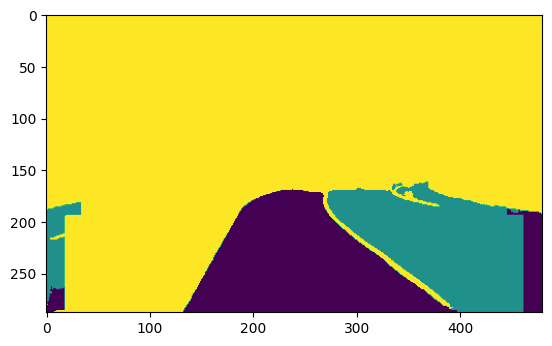

In [10]:
plt.imshow(new)